# Initial Visualisation

## Trying out candle stick visualisation with dummy data

In [1]:
# bring all the libs
from plotly.offline import init_notebook_mode, plot
from plotly.graph_objs import Candlestick as candles

import pandas as pd
# import data set
bitcoinData = pd.read_csv('bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2017-05-31.csv')

In [1]:
init_notebook_mode(connected=True)

d = {
    'Open': pd.Series([2, 3, 7, 5]),
    'Close': pd.Series([4, 5, 6, 0]),
    'High': pd.Series([3, 6, 1, 8]),
    'Low': pd.Series([1, 2, 7, 9])
}

df = pd.DataFrame(d)
print(df)

candleGraph = candles(
    x=df.index,
    open=df.Open,
    high=df.High,
    low=df.Low,
    close=df.Close
)

data = [candleGraph]
# Opens a new window with the candles
plot(data)

ModuleNotFoundError: No module named 'plotly'

## Trying out candle stick visualisation with bitcoin data

In [ ]:
bitcoinData.head()
length = len(bitcoinData)
subData = pd.DataFrame(bitcoinData, index=range(length - 10, length))
# Print some of the data
print(subData)

candleGraph = candles(
    x=subData.index,
    open=subData.Open,
    high=subData.High,
    low=subData.Low,
    close=subData.Close
)

data = [candleGraph]
# Opens a new window with the candles
plot(data)

## Viewing the head and tail of the data

In [ ]:
print(bitcoinData.head(10))
print(bitcoinData.tail(10))

# Data Cleaning

Task #1: Remove the rows that have at least 1 NaN value    
Task #2: Find out how many records have at least 1 NaN value    
Task #3: Find out how many records have no NaN values at all    
Task #4: Repeat tasks #2 and #3 giving values in percentages    

In [7]:
import math

# function that removes rows that have NaN values as elements
def remove_NaN_from_dataSet(dataSet):
    non_nan_index = []
    for row_index in dataSet.index:
#         print(row_index)
        non_nan_index.append(row_index)
        for element in dataSet.loc[row_index]:
#             print('  ', element)
            if math.isnan(element):
#                 dataSet = dataSet.drop(row_index)
#                 print('     breaking')
                non_nan_index.pop()
                break
    return pd.DataFrame(dataSet, index=non_nan_index)

print('Removing the NaN values...')
bitcoin_data_without_nan = remove_NaN_from_dataSet(bitcoinData)

# save the non NaN file
print('Saving the new data set...')
bitcoin_data_without_nan.to_csv('bitcoin-historical-data/bitstampUSD_non_nan.csv')

# find the number of records with NaN
print('Calculating the various percentages...')
original_no_records = len(bitcoinData)
non_nan_no_records = len(bitcoin_data_without_nan)
difference = original_no_records - non_nan_no_records
print('Total original bitcoin records: ', original_no_records)
print('Records with NaN:', difference)
perc_nan_records = (difference/original_no_records) * 100
print('% of NaN records: ', perc_nan_records)
print('% of non-NaN records: ', 100 - perc_nan_records)

Removing the NaN values...
Saving the new data set...
Calculating the various percentages...
Total original bitcoin records:  2841377
Records with NaN: 1190473
% of NaN records:  41.89774887316959
% of non-NaN records:  58.10225112683041


### Finding out where most of the NaN values exist (in which years)

Find out the amount of year data points in the original dataset

In [13]:
import datetime
import pandas as pd

print('Reading data...')
bitcoinData = pd.read_csv('bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2017-05-31.csv')
cleanBitcoinData = pd.read_csv('bitcoin-historical-data/bitstampUSD_non_nan.csv') 
print('Data read.')

def find_point_per_year_occurences(dataset):
    unix_timestamp_btc = dataset['Timestamp']
    year_occurences = {}
    
    for timestamp in unix_timestamp_btc:
        year = int(datetime.datetime.fromtimestamp(timestamp).strftime('%Y'))
        if year not in year_occurences:
            year_occurences[year] = 1
        else:
            year_occurences[year] = year_occurences[year] + 1
    
    return year_occurences

print('Computing results...')
subset_dataset = pd.DataFrame(bitcoinData, index=range(100))
original_year_instances = find_point_per_year_occurences(bitcoinData)
cleaned_year_instances = find_point_per_year_occurences(cleanBitcoinData)
original_year_s = pd.Series(original_year_instances)
cleaned_year_s = pd.Series(cleaned_year_instances)
print('Results computed.')

print('Original:')
print(original_year_s)
print('Cleaned:')
print(cleaned_year_s)

difference_year_instances = original_year_s - cleaned_year_s
print('Difference:')
print(difference_year_instances)

Reading data...
Data read.
Computing results...
Results computed.
Original:
2011       668
2012    527040
2013    525600
2014    525600
2015    519128
2016    527040
2017    216301
dtype: int64
Cleaned:
2011         4
2012     26609
2013    319550
2014    398199
2015    372747
2016    352068
2017    181727
dtype: int64
Difference:
2011       664
2012    500431
2013    206050
2014    127401
2015    146381
2016    174972
2017     34574
dtype: int64


In [15]:
percentage_clean = (cleaned_year_s / original_year_s) * 100
print('Percentage of clean:')
print(percentage_clean)
print('Percentage removed:')
print(100 - percentage_clean)

Percentage of clean:
2011     0.598802
2012     5.048763
2013    60.797184
2014    75.760845
2015    71.802523
2016    66.801002
2017    84.015793
dtype: float64
Percentage removed:
2011    99.401198
2012    94.951237
2013    39.202816
2014    24.239155
2015    28.197477
2016    33.198998
2017    15.984207
dtype: float64


In [18]:
def remove_year_occurences(dataset, years_to_remove):
    unix_timestamp_btc = dataset['Timestamp']
    index_to_keep = []
    
    for i in range(len(dataset)):
        year = int(datetime.datetime.fromtimestamp(unix_timestamp_btc[i]).strftime('%Y'))
        if year not in years_to_remove:
            index_to_keep.append(i)
    
#     for timestamp in unix_timestamp_btc:
#         year = int(datetime.datetime.fromtimestamp(timestamp).strftime('%Y'))
#         if year not in years_to_remove:
#             if year not in year_occurences:
#                 year_occurences[year] = 1
#             else:
#                 year_occurences[year] = year_occurences[year] + 1
    
    return pd.DataFrame(dataset, index=index_to_keep)

removed_btc = remove_year_occurences(bitcoinData, [2011, 2012, 2013])
print('removed btc:')
print(removed_btc.head(10))

print('occurences of removed years:')
print(find_point_per_year_occurences(removed_btc))

removed btc:
          Timestamp    Open    High     Low   Close  Volume_(BTC)  \
1053308  1388516400     NaN     NaN     NaN     NaN           NaN   
1053309  1388516460     NaN     NaN     NaN     NaN           NaN   
1053310  1388516520  731.51  731.51  731.51  731.51      0.013670   
1053311  1388516580  731.51  732.51  731.51  732.51      0.137977   
1053312  1388516640  731.51  731.51  731.51  731.51      0.326875   
1053313  1388516700  731.51  731.51  731.51  731.51      0.373125   
1053314  1388516760  732.51  732.51  732.51  732.51      0.070659   
1053315  1388516820  732.51  733.00  732.51  733.00      0.597845   
1053316  1388516880     NaN     NaN     NaN     NaN           NaN   
1053317  1388516940  733.00  733.00  733.00  733.00      0.006757   

         Volume_(Currency)  Weighted_Price  
1053308                NaN             NaN  
1053309                NaN             NaN  
1053310           9.999998      731.510000  
1053311         100.941789      731.582476  
10

In [20]:
import math

# function that removes rows that have NaN values as elements
def remove_NaN_from_dataSet(dataSet):
    non_nan_index = []
    for row_index in dataSet.index:
#         print(row_index)
        non_nan_index.append(row_index)
        for element in dataSet.loc[row_index]:
#             print('  ', element)
            if math.isnan(element):
#                 dataSet = dataSet.drop(row_index)
#                 print('     breaking')
                non_nan_index.pop()
                break
    return pd.DataFrame(dataSet, index=non_nan_index)

print('Removing nan...')
non_nan_btc = remove_NaN_from_dataSet(removed_btc)
print('nan removed.')

print('Year occurences:')
print(find_point_per_year_occurences(non_nan_btc))

print('Storing dataset...')
non_nan_btc.to_csv('bitcoin-historical-data/bitstampUSD_14_15_16_17_no_nan.csv')
print('Dataset stored')

Removing nan...
nan removed.
Year occurences:
{2014: 398199, 2015: 372747, 2016: 352068, 2017: 181727}
Storing dataset...
Dataset stored


Fix indexing in 'non_nan_btc' dataset

In [3]:
import pandas as pd
non_nan_btc = pd.read_csv('bitcoin-historical-data/bitstampUSD_14_15_16_17_no_nan.csv') 

def fix_indexing(dataset):
    dataset = pd.DataFrame(dataset)
    length = len(dataset)
    normal_index = 0
    print(dataset.index)
    for abnormal_index in dataset.index:
#         print('abnormal index: ', abnormal_index)
#         print(dataset.loc[abnormal_index])
#         print(dataset.loc[normal_index])
        dataset.loc[normal_index] = dataset.loc[abnormal_index]
        dataset['Timestamp'][normal_index] = int(dataset['Timestamp'][normal_index])
        normal_index = normal_index + 1
    return pd.DataFrame(dataset, index=range(length))

print('Computing...')
fix_indexing_btc = fix_indexing(pd.DataFrame(non_nan_btc, index=[1053310, 1053311, 1053312]))
print('Computed.')
print('Saving...')
fix_indexing_btc.to_csv('bitcoin-historical-data/bitstampUSD_14_15_16_17_no_nan_index_fixed.csv')
print('Saved')

# print(non_nan_btc.head())
# print(type(non_nan_btc))
# non_nan_btc.index

Computing...
Int64Index([1053310, 1053311, 1053312], dtype='int64')
Computed.
Saving...
Saved


In [26]:
test_dataset = pd.DataFrame(non_nan_btc, index=[1053310, 1053311, 1053312])

# print(non_nan_btc)
# print(test_dataset)

# Example:
# test_dataset = test_dataset.reset_index()
# print(test_dataset)
# print(list(test_dataset))
# test_dataset = test_dataset.drop('Unnamed: 0', axis=1)
# test_dataset = test_dataset.drop('index', axis=1)

cleaned_btc = non_nan_btc.reset_index()
# print(cleaned_btc)
# print(list(cleaned_btc))
cleaned_btc = cleaned_btc.drop('Unnamed: 0', axis=1)
cleaned_btc = cleaned_btc.drop('index', axis=1)

print('Saving...')
cleaned_btc.to_csv('bitcoin-historical-data/bitstampUSD_14_15_16_17_no_nan_index_fixed.csv')
print('Saved')

Saving...
Saved


In [25]:
cleaned_btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1388516520,731.51,731.51,731.51,731.51,0.013670,9.999998,731.510000
1,1388516580,731.51,732.51,731.51,732.51,0.137977,100.941789,731.582476
2,1388516640,731.51,731.51,731.51,731.51,0.326875,239.112170,731.510000
3,1388516700,731.51,731.51,731.51,731.51,0.373125,272.944830,731.510000
4,1388516760,732.51,732.51,732.51,732.51,0.070659,51.758563,732.510000
5,1388516820,732.51,733.00,732.51,733.00,0.597845,438.178649,732.929749
6,1388516940,733.00,733.00,733.00,733.00,0.006757,4.952588,733.000000
7,1388517000,733.00,733.00,733.00,733.00,0.297701,218.214723,733.000000
8,1388517180,733.00,733.00,733.00,733.00,6.225250,4563.108184,733.000000
9,1388517300,732.54,732.54,732.54,732.54,0.218521,160.075593,732.540000


# Financial Trading Simulation

### Simulation of Dual Moving Average

In [1]:
import pandas as pd

# import clean data
print('Reading data...')
cleanBitcoinData = pd.read_csv('bitcoin-historical-data/bitstampUSD_non_nan.csv')        
print('Data read.')

Reading data...
Data read.


Trying out plotting graphs

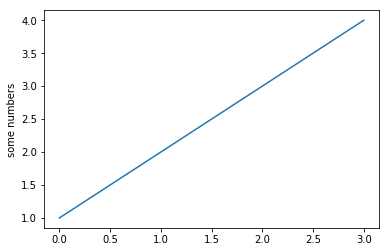

In [55]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

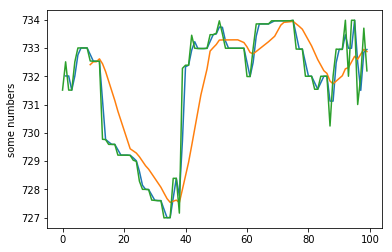

(81.730000000000004, 0.01)

In [32]:
import math
import matplotlib.pyplot as plt

def dual_moving_strategy(btc_dataSet, short_moving_interval, long_moving_interval, total_usd_wealth):
    # data set must be greater in row size than long moving average interval
#     print(len(btc_dataSet.index))
#     print(btc_dataSet.head(20))
#     print(long_moving_interval)
    if len(btc_dataSet.index) < long_moving_interval:
        print('Error: Data set row size must be greater than long moving average.')
        return
    
    close_btc = btc_dataSet['Close']
    usd_per_btc = btc_dataSet['Weighted_Price']
    short_mavg = close_btc.rolling(short_moving_interval).mean()
    long_mavg = close_btc.rolling(long_moving_interval).mean()
    
    plt.plot(range(len(btc_dataSet)), short_mavg, 'r', range(len(btc_dataSet)), long_mavg, 'b', range(len(btc_dataSet)), close_btc, 'g')
    plt.ylabel('some numbers')
    plt.show()

    # total wealth (in $)
    usd_wealth = total_usd_wealth
    # total welath (in btc)
    btc_wealth = 0.0

    # true if short_mavg > long_mavg
    # false if long_mavg <= short_mavg
    prev_status = None
    curr_status = None
    for index in range(len(long_mavg)):
#         print(btc_dataSet.loc[index])
        prev_status = curr_status
        curr_status = True if short_mavg[index] > long_mavg[index] else False
    
        # if value is not available or the status does not exist (initial stages)
        if math.isnan(long_mavg[index]) or prev_status is None:
            continue
        # buy BTC / sell USD
        elif curr_status == True and prev_status == False:
            # buy BTC worth 10% of wealth
            usd_to_sell = round(usd_wealth * 0.1, 2) 
            btc_to_buy = round(usd_to_sell / usd_per_btc[index], 2)
            usd_wealth = usd_wealth - usd_to_sell
            btc_wealth = btc_wealth + btc_to_buy
#             print('buy BTC / sell USD')
#             print('usd_to_sell:', usd_to_sell)
#             print('Total USD wealth:', usd_wealth)
        # sell USD / buy BTC
        elif curr_status == False and prev_status == True:
            # sell all BTC
            usd_to_buy = round(btc_wealth * usd_per_btc[index], 2)
            usd_wealth = usd_wealth + usd_to_buy
            btc_wealth = 0
#             print('sell USD / buy BTC')
#             print('usd_to_buy:', usd_to_buy)
#             print('Total USD wealth:', usd_wealth)
#         print('\n')
    return (usd_wealth, btc_wealth)

new_subset_btc_data = pd.DataFrame(cleaned_btc, index=range(100))
dual_moving_strategy(new_subset_btc_data, 2, 10, 100)
    

In [ ]:
import math

def stochastics_oscillator(btc_dataSet, usd_wealth):
    close_btc = btc_dataSet['Close']
    usd_per_btc = btc_dataSet['Weighted_Price']
    high_btc = btc_dataSet['High']
    low_btc = btc_dataSet['Low']
    records = len(high_btc)
    btc_wealth = 0.0
    k = pd.Series((math.nan, math.nan, math.nan, math.nan))
    
    # Start at 5th record to the end of the data set
    for index in range(4, records):
        prev_close = close_btc[index - 1]
        lowest_of_5_lows = min(low_btc[index], low_btc[index - 1], low_btc[index - 2], low_btc[index - 3], low_btc[index - 4])
        highest_of_5_highs = max(high_btc[index], high_btc[index - 1], high_btc[index - 2], high_btc[index - 3], high_btc[index - 4])
        
        # used to avoid divison by 0 in below equation
        if highest_of_5_highs == lowest_of_5_lows:
            k[index] = k[index - 1]
            continue
        # possible that divison by 0 might occur: when highest_of_5_highs = 0 and lowest_of_5_lows = 0 
        k[index] = 100 * ((prev_close - lowest_of_5_lows) / (highest_of_5_highs - lowest_of_5_lows))
        
    # for debugging
#     count = 0
#     for val in k:
#         if math.isnan(val):
#             count = count + 1
#     print('count: ', count)
#     print(k)
        
    
    d = k.rolling(3).mean()
    
    i = 0
    nanCount = 0
    for val in d:
        print('i: ', i)
        if math.isnan(val):
            nanCount = nanCount + 1
            i = i + 1
            continue
        # buy BTC / sell USD
        elif val < 20:
            # buy BTC worth 10% of wealth
            usd_to_sell = round(usd_wealth * 0.1, 2) 
            btc_to_buy = round(usd_to_sell / usd_per_btc[index], 2)
            usd_wealth = usd_wealth - usd_to_sell
            btc_wealth = btc_wealth + btc_to_buy
#             print('buy BTC / sell USD')
#             print('usd_to_sell:', usd_to_sell)
#             print('Total USD wealth:', usd_wealth)
        elif val > 80:
            # sell all BTC
            usd_to_buy = round(btc_wealth * usd_per_btc[index], 2)
            usd_wealth = usd_wealth + usd_to_buy
            btc_wealth = 0
#             print('sell USD / buy BTC')
#             print('usd_to_buy:', usd_to_buy)
#             print('Total USD wealth:', usd_wealth)
        i = i + 1
    return (usd_wealth, btc_wealth, nanCount)

# subset_btc_data = pd.DataFrame(cleanBitcoinData, index=range(1000))
stochastics_oscillator(cleanBitcoinData, 100)
            

In [15]:
# testing:
print(cleanBitcoinData.head())
2 / 0.455

   Unnamed: 0   Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0           0  1325317920  4.39  4.39  4.39   4.39      0.455581   
1         478  1325346600  4.39  4.39  4.39   4.39     48.000000   
2         547  1325350740  4.50  4.57  4.50   4.57     37.862297   
3         548  1325350800  4.58  4.58  4.58   4.58      9.000000   
4        1224  1325391360  4.58  4.58  4.58   4.58      1.502000   

   Volume_(Currency)  Weighted_Price  
0           2.000000        4.390000  
1         210.720000        4.390000  
2         171.380338        4.526411  
3          41.220000        4.580000  
4           6.879160        4.580000  


4.395604395604395